# Import Libraries

In [28]:

# Data Cleaning
import pandas as pd
import re
import numpy as np

# Data Visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

Objective:
Can the quality rating of chocolate bars be predicted from the region of the beans, year produced, country of manufacturer, or number of ingredients of the raw chocolate?

# Import Data

[Data Source](http://flavorsofcacao.com/chocolate_database.html) - Flavors of Cocoa

In [29]:
data = pd.read_csv('./chocolate.csv')

In [30]:
data.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2530 non-null   int64  
 1   Company (Manufacturer)            2530 non-null   object 
 2   Company Location                  2530 non-null   object 
 3   Review Date                       2530 non-null   int64  
 4   Country of Bean Origin            2530 non-null   object 
 5   Specific Bean Origin or Bar Name  2530 non-null   object 
 6   Cocoa Percent                     2530 non-null   object 
 7   Ingredients                       2443 non-null   object 
 8   Most Memorable Characteristics    2530 non-null   object 
 9   Rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


# Data Cleaning

In [32]:
data['Company (Manufacturer)'].value_counts()

Soma                                   56
Fresco                                 39
Arete                                  32
Bonnat                                 30
A. Morin                               26
                                       ..
Rancho San Jacinto                      1
Raoul Boulanger                         1
Raw Cocoa                               1
Heirloom Cacao Preservation (Mindo)     1
Manifesto Cacao                         1
Name: Company (Manufacturer), Length: 580, dtype: int64

In [33]:
data.columns

Index(['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics',
       'Rating'],
      dtype='object')

In [34]:
data.rename(columns={
    'REF': 'ref',
    'Company (Manufacturer)': 'company',
    'Company Location': 'country_company',
    'Review Date': 'date',
    'Country of Bean Origin': 'country_bean',
    'Specific Bean Origin or Bar Name': 'bean',
    'Cocoa Percent': 'cocoa',
    'Ingredients': 'ingredients',
    'Most Memorable Characteristics': 'characteristics',
    'Rating': 'rating'
}, inplace=True)

In [35]:
data.head()

,ref,company,country_company,date,country_bean,bean,cocoa,ingredients,characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [36]:
data['cocoa'] = data['cocoa'].str.replace('%', '').astype(float)

In [37]:
data['bean'].map(lambda x: re.sub(', batch*.*', '', x)).nunique()

1451

Too many uniue values. Will focus on country of bean origin

In [38]:
data.drop(columns=['ref', 'bean'], inplace=True)

In [39]:
data.head()

,company,country_company,date,country_bean,cocoa,ingredients,characteristics,rating
0,5150,U.S.A.,2019,Tanzania,76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,5150,U.S.A.,2019,Dominican Republic,76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,5150,U.S.A.,2019,Madagascar,76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
3,5150,U.S.A.,2021,Fiji,68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,5150,U.S.A.,2021,Venezuela,72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          2530 non-null   object 
 1   country_company  2530 non-null   object 
 2   date             2530 non-null   int64  
 3   country_bean     2530 non-null   object 
 4   cocoa            2530 non-null   float64
 5   ingredients      2443 non-null   object 
 6   characteristics  2530 non-null   object 
 7   rating           2530 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 158.2+ KB


In [41]:
data['ingredients'].fillna('0', inplace=True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          2530 non-null   object 
 1   country_company  2530 non-null   object 
 2   date             2530 non-null   int64  
 3   country_bean     2530 non-null   object 
 4   cocoa            2530 non-null   float64
 5   ingredients      2530 non-null   object 
 6   characteristics  2530 non-null   object 
 7   rating           2530 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 158.2+ KB


In [43]:
data['ing_num'] = [i[:1] for i in data['ingredients']]

In [44]:
data['ing_num'] = data['ing_num'].astype(int)

In [45]:
data['ing_list'] = [i[3:] for i in data['ingredients']]

In [46]:
data = pd.concat([data, data['ing_list'].str.get_dummies(sep=',')], axis=1)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          2530 non-null   object 
 1   country_company  2530 non-null   object 
 2   date             2530 non-null   int64  
 3   country_bean     2530 non-null   object 
 4   cocoa            2530 non-null   float64
 5   ingredients      2530 non-null   object 
 6   characteristics  2530 non-null   object 
 7   rating           2530 non-null   float64
 8   ing_num          2530 non-null   int64  
 9   ing_list         2530 non-null   object 
 10  B                2530 non-null   int64  
 11  C                2530 non-null   int64  
 12  L                2530 non-null   int64  
 13  S                2530 non-null   int64  
 14  S*               2530 non-null   int64  
 15  Sa               2530 non-null   int64  
 16  V                2530 non-null   int64  
dtypes: float64(2),

In [48]:
data.head()

,company,country_company,date,country_bean,cocoa,ingredients,characteristics,rating,ing_num,ing_list,B,C,L,S,S*,Sa,V
0,5150,U.S.A.,2019,Tanzania,76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,3,"B,S,C",1,1,0,1,0,0,0
1,5150,U.S.A.,2019,Dominican Republic,76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,3,"B,S,C",1,1,0,1,0,0,0
2,5150,U.S.A.,2019,Madagascar,76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,3,"B,S,C",1,1,0,1,0,0,0
3,5150,U.S.A.,2021,Fiji,68.0,"3- B,S,C","chewy, off, rubbery",3.00,3,"B,S,C",1,1,0,1,0,0,0
4,5150,U.S.A.,2021,Venezuela,72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,3,"B,S,C",1,1,0,1,0,0,0


In [49]:
data.drop(columns=['ingredients', 'ing_list'], inplace=True)

In [50]:
data.head()

,company,country_company,date,country_bean,cocoa,characteristics,rating,ing_num,B,C,L,S,S*,Sa,V
0,5150,U.S.A.,2019,Tanzania,76.0,"rich cocoa, fatty, bready",3.25,3,1,1,0,1,0,0,0
1,5150,U.S.A.,2019,Dominican Republic,76.0,"cocoa, vegetal, savory",3.50,3,1,1,0,1,0,0,0
2,5150,U.S.A.,2019,Madagascar,76.0,"cocoa, blackberry, full body",3.75,3,1,1,0,1,0,0,0
3,5150,U.S.A.,2021,Fiji,68.0,"chewy, off, rubbery",3.00,3,1,1,0,1,0,0,0
4,5150,U.S.A.,2021,Venezuela,72.0,"fatty, earthy, moss, nutty,chalky",3.00,3,1,1,0,1,0,0,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          2530 non-null   object 
 1   country_company  2530 non-null   object 
 2   date             2530 non-null   int64  
 3   country_bean     2530 non-null   object 
 4   cocoa            2530 non-null   float64
 5   characteristics  2530 non-null   object 
 6   rating           2530 non-null   float64
 7   ing_num          2530 non-null   int64  
 8   B                2530 non-null   int64  
 9   C                2530 non-null   int64  
 10  L                2530 non-null   int64  
 11  S                2530 non-null   int64  
 12  S*               2530 non-null   int64  
 13  Sa               2530 non-null   int64  
 14  V                2530 non-null   int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 296.6+ KB


# Data Visualizations

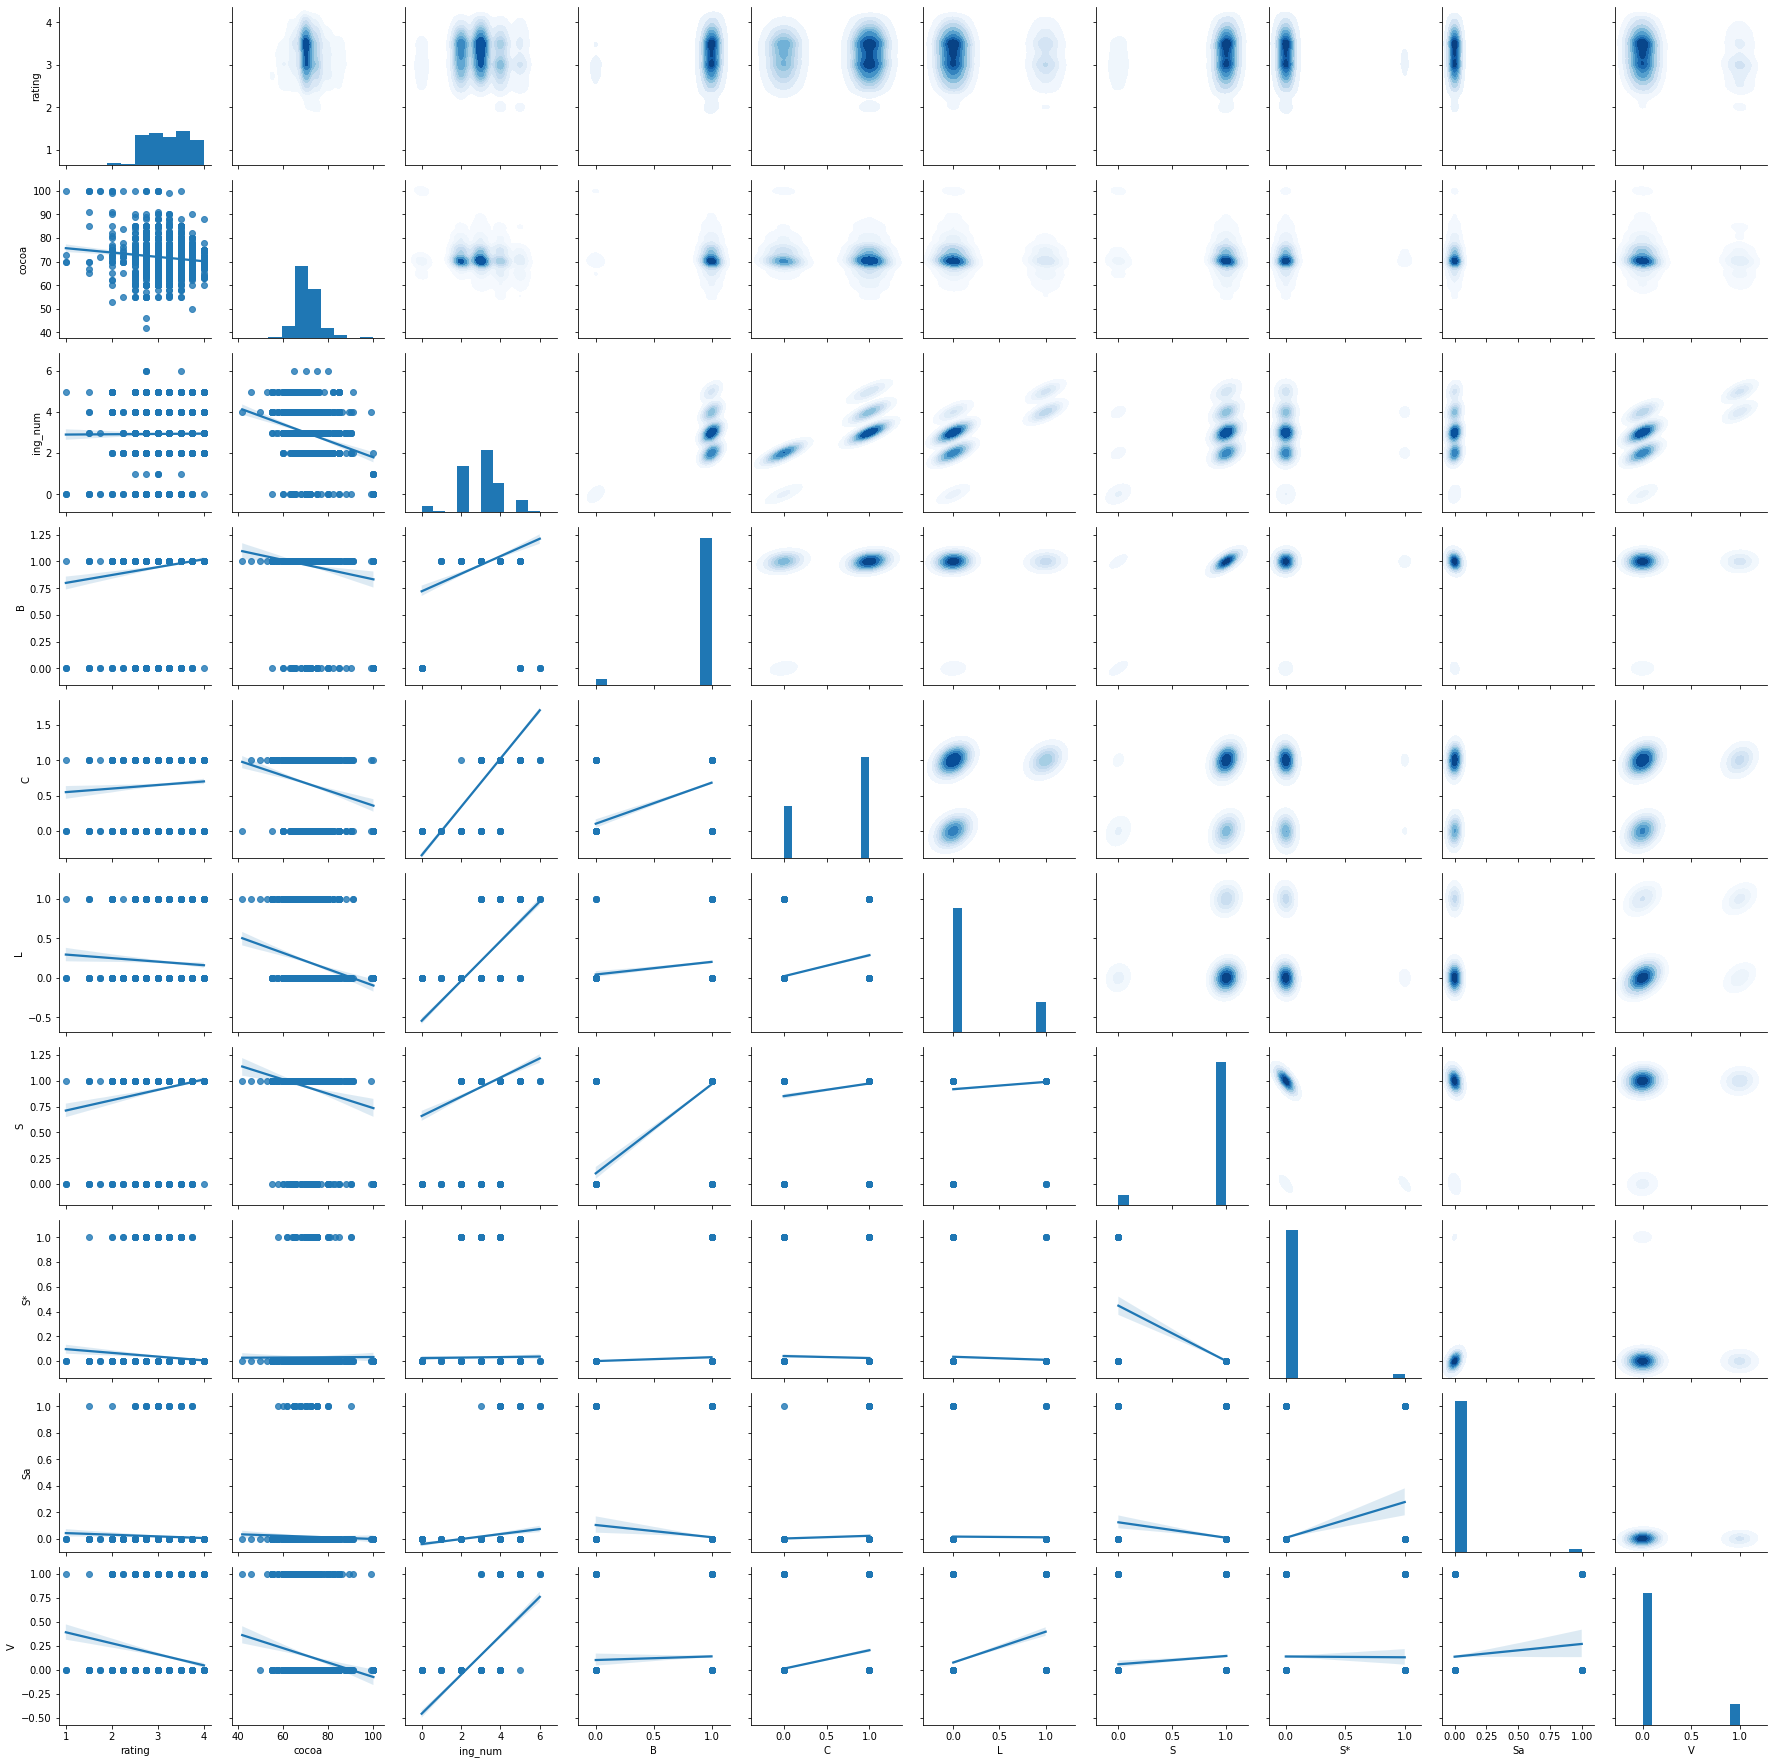

In [52]:
g = sns.PairGrid(data[['rating', 'cocoa', 'ing_num', 'B', 'C', 'L', 'S', 'S*', 'Sa', 'V']])
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap='Blues', thresh=0.05, shade=True)
g = g.map_diag(plt.hist)

In [54]:
px.scatter(data_frame=data, x='cocoa', y='rating', trendline="lowess", title='Rating vs % of Cocoa')
# trend line: LOcally WEighted Scatterplot Smoothing (LOWESS)

In [55]:
px.scatter(data_frame=data, x='ing_num', y='cocoa', color='rating', title='Number of Ingredients x Cocoa x Rating')

Descriptive Statistics by Manufacturing Company Country

In [56]:
data.groupby('country_company').mean().sort_values(by='rating', ascending=False).describe()

,date,cocoa,rating,ing_num,B,C,L,S,S*,Sa,V
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,2014.706341,71.210785,3.118456,2.957120,0.946823,0.638752,0.260776,0.926565,0.026990,0.018500,0.130860
std,2.729272,4.547423,0.223693,0.767120,0.129604,0.334106,0.334396,0.137447,0.085387,0.092085,0.245124
min,2008.222222,42.000000,2.625000,0.666667,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
25%,2013.015873,70.008065,3.000000,2.527778,0.962614,0.448029,0.000000,0.888373,0.000000,0.000000,0.000000
50%,2015.000000,71.227273,3.181818,2.962264,1.000000,0.727273,0.098592,1.000000,0.000000,0.000000,0.000000
75%,2016.590323,72.284615,3.261206,3.409091,1.000000,0.914863,0.486111,1.000000,0.000000,0.000000,0.159710
max,2019.000000,82.125000,3.750000,5.000000,1.000000,1.000000,1.000000,1.000000,0.566667,0.566667,1.000000


In [57]:
fig = px.bar(
    data_frame=data.groupby('country_company').mean().sort_values(by='rating', ascending=False)[:20], 
    x=data.groupby('country_company').mean().sort_values(by='rating', ascending=False)[:20].index, 
    y=data.groupby('country_company').mean().sort_values(by='rating', ascending=False)['rating'][:20],
    title='Rating by Manufacturing Country'
    )
fig.add_hline(y=data['rating'].mean())

Descriptive Statistics by Bean Country

In [58]:
data.groupby('country_bean').mean().sort_values(by='rating', ascending=False).describe()

,date,cocoa,rating,ing_num,B,C,L,S,S*,Sa,V
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,2015.168899,70.829692,3.136862,2.990655,0.965808,0.680617,0.252788,0.900485,0.061656,0.012561,0.114523
std,2.451381,4.383791,0.186082,0.532318,0.080285,0.256756,0.281900,0.197840,0.187597,0.029989,0.168204
min,2010.500000,42.000000,2.714286,1.666667,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.022727,70.000000,3.044471,2.645559,0.965810,0.540667,0.050658,0.891667,0.000000,0.000000,0.000000
50%,2015.038462,71.337762,3.164335,2.975714,1.000000,0.686216,0.165152,0.965440,0.000000,0.000000,0.046316
75%,2017.300000,72.013340,3.250000,3.324811,1.000000,0.880952,0.316919,1.000000,0.043186,0.012567,0.165000
max,2021.000000,82.333333,3.625000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.181818,1.000000


In [59]:
fig = px.bar(
    data_frame=data.groupby('country_bean').mean().sort_values(by='rating', ascending=False)[:20], 
    x=data.groupby('country_bean').mean().sort_values(by='rating', ascending=False)[:20].index, 
    y=data.groupby('country_bean').mean().sort_values(by='rating', ascending=False)['rating'][:20],
    title='Rating by Bean Country'
    )
fig.add_hline(y=data['rating'].mean())

In [60]:
px.line(data_frame=data.groupby('date').mean()['rating'], title='Average Chocolate Rating Over Time')

# Models

In [61]:
y = data['rating']
X = data.drop(columns=['rating', 'company', 'country_company', 'country_bean', 'characteristics'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [62]:
model_results = {}

Baseline

In [63]:
y_test.mean()

3.178120063191153

In [64]:
r2_score(y_test, np.full_like(y_test, y_test.mean()))

0.0

In [76]:
model_results['Baseline'] = ['y mean', np.round(mean_squared_error(y_test, np.full_like(y_test, y_test.mean()), squared=False), 3)]
baseline_rmse = np.round(mean_squared_error(y_test, np.full_like(y_test, y_test.mean()), squared=False), 3)
baseline_rmse

0.451

Helper Functions

In [77]:
def get_errors(estimator, X_train, X_test, y_test, y_train):
    print(f'Train R2:       {np.round(estimator.score(X_train, y_train), 3)}')
    print(f'Test R2:        {np.round(estimator.score(X_test, y_test), 3)}')
    print(f'Baseline RMSE: {baseline_rmse}')
    print(f'Train RMSE:     {np.round(mean_squared_error(y_train, estimator.predict(X_train), squared=False), 3)}')
    print(f'Test RMSE:      {np.round(mean_squared_error(y_test, estimator.predict(X_test), squared=False), 3)}')

In [78]:
def update_scores(name, attributes, estimator, y_test, X_test):
    global model_results
    score = np.round(mean_squared_error(y_test, estimator.predict(X_test), squared=False), 3)

    if name not in model_results.keys():
        model_results[name] = [attributes, score]
        print(f'{name} added')
        print(f'{name} RMSE: {score}')
    elif model_results.get(name)[1] > score:
        model_results[name][1] = score
        print(f'{name} updated')
        print(f'{name} RMSE: {score}')
    else:
        print(f'{name} same score')

In [79]:
ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [80]:
param_l = {
    'alpha': [.0001, .001, .01, .1, .5, .75, 1, 2],
}
gs_l_simple = GridSearchCV(Lasso(max_iter=10_000, random_state=42), param_l)
gs_l_simple.fit(X_train, y_train)
get_errors(gs_l_simple, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Lasso 1', 'Simple', gs_l_simple, y_test, X_test)

Train R2:       0.09
Test R2:        0.06
Baseline RMSE: 0.451
Train RMSE:     0.423
Test RMSE:      0.437
Lasso 1 same score


In [81]:
param_r = {
    'alpha': [.0001, .001, .01, .1, .5, .75, 1, 2],
}
gs_r_simple = GridSearchCV(Ridge(random_state=42, max_iter=10_000), param_r)
gs_r_simple.fit(X_train, y_train)
get_errors(gs_r_simple, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Ridge 1', 'Simple', gs_r_simple, y_test, X_test)

Train R2:       0.09
Test R2:        0.06
Baseline RMSE: 0.451
Train RMSE:     0.423
Test RMSE:      0.437
Ridge 1 added
Ridge 1 RMSE: 0.437


Very poor results! Lets add some more variables

In [82]:
data = pd.concat([data, pd.get_dummies(data['country_bean'].str.lower(), prefix='bean')], axis=1)

In [83]:
y = data['rating']
X = data.drop(columns=['rating', 'company', 'country_company', 'country_bean', 'characteristics'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [84]:
param_l = {
    'alpha': [.0001, .001, .01, .1, .5, .75, 1, 2],
}
gs_l_b_country = GridSearchCV(Lasso(max_iter=10_000, random_state=42), param_l)
gs_l_b_country.fit(X_train, y_train)
get_errors(gs_l_b_country, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Lasso 2', 'Country Bean', gs_l_b_country, y_test, X_test)

Train R2:       0.103
Test R2:        0.059
Baseline RMSE: 0.451
Train RMSE:     0.42
Test RMSE:      0.437
Lasso 2 added
Lasso 2 RMSE: 0.437


In [85]:
param_r = {
    'alpha': [.0001, .001, .01, .1, .5, .75, 1, 2],
}
gs_r_b_country = GridSearchCV(Ridge(random_state=42, max_iter=10_000), param_r)
gs_r_b_country.fit(X_train, y_train)
get_errors(gs_r_b_country, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Ridge 2', 'Bean Country', gs_r_b_country, y_test, X_test)

Train R2:       0.124
Test R2:        0.044
Baseline RMSE: 0.451
Train RMSE:     0.415
Test RMSE:      0.441
Ridge 2 added
Ridge 2 RMSE: 0.441


Add top 50 most common characteristics

In [86]:
n = 50
top_chars = data['characteristics'].str.replace(' ', '').str.get_dummies(sep=',').sum().sort_values(ascending=False)[:n].index
chars = data['characteristics'].str.replace(' ', '').str.get_dummies(sep=',')
data = pd.concat([data, chars.drop(columns=chars.columns[~chars.columns.isin(top_chars)].tolist())], axis=1)

In [87]:
y = data['rating']
X = data.drop(columns=['rating', 'company', 'country_company', 'country_bean', 'characteristics'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [88]:
param_l = {
    'alpha': [.0001, .001, .01],
}
gs_l_50 = GridSearchCV(Lasso(max_iter=10_000, random_state=42), param_l)
gs_l_50.fit(X_train, y_train)
get_errors(gs_l_50, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Lasso 3', '50 Characteristics', gs_l_50, y_test, X_test)

Train R2:       0.309
Test R2:        0.234
Baseline RMSE: 0.451
Train RMSE:     0.368
Test RMSE:      0.395
Lasso 3 added
Lasso 3 RMSE: 0.395


In [89]:
param_r = {
    'alpha': [.0001, .001, .01],
}
gs_r_50 = GridSearchCV(Ridge(random_state=42, max_iter=10_000), param_r)
gs_r_50.fit(X_train, y_train)
get_errors(gs_r_50, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Ridge 3', '50 Characteristics', gs_r_50, y_test, X_test)

Train R2:       0.346
Test R2:        0.227
Baseline RMSE: 0.451
Train RMSE:     0.358
Test RMSE:      0.397
Ridge 3 added
Ridge 3 RMSE: 0.397


Get top 100 most common characteristics

In [90]:
n = 50
top_chars = data['characteristics'].str.replace(' ', '').str.get_dummies(sep=',').sum().sort_values(ascending=False)[n:(n*2)].index
chars = data['characteristics'].str.replace(' ', '').str.get_dummies(sep=',')
data = pd.concat([data, chars.drop(columns=chars.columns[~chars.columns.isin(top_chars)].tolist())], axis=1)

In [91]:
y = data['rating']
X = data.drop(columns=['rating', 'company', 'country_company', 'date', 'country_bean', 'characteristics'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [92]:
param_l = {
    'alpha': [.0001, .001, .01],
}
gs_l_100 = GridSearchCV(Lasso(max_iter=10_000, random_state=42), param_l)
gs_l_100.fit(X_train, y_train)
get_errors(gs_l_100, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Lasso 4', '100 Characteristics', gs_l_100, y_test, X_test)

Train R2:       0.438
Test R2:        0.336
Baseline RMSE: 0.451
Train RMSE:     0.332
Test RMSE:      0.367
Lasso 4 added
Lasso 4 RMSE: 0.367


In [93]:
param_r = {
    'alpha': [.0001, .001, .01],
}
gs_r_100 = GridSearchCV(Ridge(random_state=42, max_iter=10_000), param_r)
gs_r_100.fit(X_train, y_train)
get_errors(gs_r_100, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Ridge 4', '100 Characteristics', gs_r_100, y_test, X_test)

Train R2:       0.439
Test R2:        0.333
Baseline RMSE: 0.451
Train RMSE:     0.332
Test RMSE:      0.368
Ridge 4 added
Ridge 4 RMSE: 0.368


Add 100 more characteristics (200 total)

In [94]:
n = 100
top_chars = data['characteristics'].str.replace(' ', '').str.get_dummies(sep=',').sum().sort_values(ascending=False)[n:(n*2)].index
chars = data['characteristics'].str.replace(' ', '').str.get_dummies(sep=',')
data = pd.concat([data, chars.drop(columns=chars.columns[~chars.columns.isin(top_chars)].tolist())], axis=1)

In [95]:
y = data['rating']
X = data.drop(columns=['rating', 'company', 'country_company', 'date', 'country_bean', 'characteristics'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [96]:
param_l = {
    'alpha': [.0001, .001, .01],
}
gs_l_200 = GridSearchCV(Lasso(max_iter=10_000, random_state=42), param_l)
gs_l_200.fit(X_train, y_train)
get_errors(gs_l_200, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Lasso 5', '200 Characteristics', gs_l_200, y_test, X_test)

Train R2:       0.462
Test R2:        0.385
Baseline RMSE: 0.451
Train RMSE:     0.325
Test RMSE:      0.354
Lasso 5 added
Lasso 5 RMSE: 0.354


In [97]:
param_r = {
    'alpha': [.0001, .001, .01],
}
gs_r_200 = GridSearchCV(Ridge(random_state=42, max_iter=10_000), param_r)
gs_r_200.fit(X_train, y_train)
get_errors(gs_r_200, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Ridge 5', '200 Characteristics', gs_r_200, y_test, X_test)

Train R2:       0.535
Test R2:        0.352
Baseline RMSE: 0.451
Train RMSE:     0.302
Test RMSE:      0.363
Ridge 5 added
Ridge 5 RMSE: 0.363


100 more characteristics

In [98]:
n = 100
top_chars = data['characteristics'].str.replace(' ', '').str.get_dummies(sep=',').sum().sort_values(ascending=False)[(n*2):(n*3)].index
chars = data['characteristics'].str.replace(' ', '').str.get_dummies(sep=',')
data = pd.concat([data, chars.drop(columns=chars.columns[~chars.columns.isin(top_chars)].tolist())], axis=1)

In [99]:
data.shape

(2530, 377)

In [100]:
y = data['rating']
X = data.drop(columns=['rating', 'company', 'country_company', 'date', 'country_bean', 'characteristics'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [101]:
print("Lasso")
param_l = {
    'alpha': [.0001, .001, .01],
}
gs_l_300 = GridSearchCV(Lasso(max_iter=10_000, random_state=42), param_l)
gs_l_300.fit(X_train, y_train)
get_errors(gs_l_300, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Lasso 6', '300 Characteristics', gs_l_300, y_test, X_test)
print("="*100)
print("")

print("Ridge")
param_r = {
    'alpha': [.0001, .001, .01],
}
gs_r_300 = GridSearchCV(Ridge(random_state=42, max_iter=10_000), param_r)
gs_r_300.fit(X_train, y_train)
get_errors(gs_r_300, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Ridge 6', '300 Characteristics', gs_r_300, y_test, X_test)

Lasso
Train R2:       0.483
Test R2:        0.392
Baseline RMSE: 0.451
Train RMSE:     0.319
Test RMSE:      0.352
Lasso 6 added
Lasso 6 RMSE: 0.352

Ridge
Train R2:       0.577
Test R2:        0.33
Baseline RMSE: 0.451
Train RMSE:     0.288
Test RMSE:      0.369
Ridge 6 added
Ridge 6 RMSE: 0.369


100 more chars (400 total)

In [102]:
n = 100
top_chars = data['characteristics'].str.replace(' ', '').str.get_dummies(sep=',').sum().sort_values(ascending=False)[(n*3):(n*4)].index
chars = data['characteristics'].str.replace(' ', '').str.get_dummies(sep=',')
data = pd.concat([data, chars.drop(columns=chars.columns[~chars.columns.isin(top_chars)].tolist())], axis=1)
data.shape

(2530, 477)

In [103]:
y = data['rating']
X = data.drop(columns=['rating', 'company', 'country_company', 'date', 'country_bean', 'characteristics'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [104]:
print("Lasso")
param_l = {
    'alpha': [.0001, .001, .01, .1],
}
gs_l_400 = GridSearchCV(Lasso(max_iter=10_000, random_state=42), param_l)
gs_l_400.fit(X_train, y_train)
get_errors(gs_l_400, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Lasso 7', '400 Characteristics', gs_l_400, y_test, X_test)
print("="*100)
print("")
print("Ridge")
param_r = {
    'alpha': [.0001, .001, .01, .1],
}
gs_r_400 = GridSearchCV(Ridge(random_state=42, max_iter=10_000), param_r)
gs_r_400.fit(X_train, y_train)
get_errors(gs_r_400, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Ridge 7', '400 Characteristics', gs_r_400, y_test, X_test)

Lasso
Train R2:       0.504
Test R2:        0.391
Baseline RMSE: 0.451
Train RMSE:     0.312
Test RMSE:      0.352
Lasso 7 added
Lasso 7 RMSE: 0.352

Ridge
Train R2:       0.616
Test R2:        0.334
Baseline RMSE: 0.451
Train RMSE:     0.274
Test RMSE:      0.368
Ridge 7 added
Ridge 7 RMSE: 0.368


In [105]:
lr_400 = Lasso(max_iter=10_000, random_state=42, alpha=.015)
lr_400.fit(X_train, y_train)
rr_400 = Ridge(random_state=42, max_iter=10_000, alpha=.015)
rr_400.fit(X_train, y_train)

print("Lasso")
get_errors(lr_400, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Lasso 7', '400 Characteristics', lr_400, y_test, X_test)
print("="*100)
print("Ridge")
get_errors(rr_400, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Ridge 7', '400 Characteristics', rr_400, y_test, X_test)

Lasso
Train R2:       0.437
Test R2:        0.358
Baseline RMSE: 0.451
Train RMSE:     0.332
Test RMSE:      0.361
Lasso 7 same score
Ridge
Train R2:       0.616
Test R2:        0.334
Baseline RMSE: 0.451
Train RMSE:     0.274
Test RMSE:      0.368
Ridge 7 same score


300 characteristics looks like the sweet spot.

In [106]:
data = data.iloc[:,:377]

In [107]:
bean_country = list(data.columns[data.columns.str.contains('bean_')])

In [108]:
cols = ['rating', 'company', 'country_company', 'date', 'country_bean', 'characteristics']

Drop bean country

In [109]:
drop_cols = cols + bean_country
y = data['rating']
X = data.drop(columns=drop_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [110]:
lr_300_no_c = Lasso(max_iter=10_000, random_state=42, alpha=.015)
lr_300_no_c.fit(X_train, y_train)
rr_300_no_c = Ridge(random_state=42, max_iter=10_000, alpha=.015)
rr_300_no_c.fit(X_train, y_train)

print("Lasso")
get_errors(lr_300_no_c, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Lasso 8', '300 Characteristics No Bean Count', lr_300_no_c, y_test, X_test)
print("="*100)
print("Ridge")
get_errors(rr_300_no_c, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Ridge 8', '300 Characteristics No Bean Count', rr_300_no_c, y_test, X_test)

Lasso
Train R2:       0.418
Test R2:        0.357
Baseline RMSE: 0.451
Train RMSE:     0.338
Test RMSE:      0.361
Lasso 8 added
Lasso 8 RMSE: 0.361
Ridge
Train R2:       0.559
Test R2:        0.351
Baseline RMSE: 0.451
Train RMSE:     0.294
Test RMSE:      0.363
Ridge 8 added
Ridge 8 RMSE: 0.363


RMSE increased by about .01 when removing country of bean origin

In [111]:
data = pd.concat([data, pd.get_dummies(data['country_company'].str.lower(), prefix='comp')], axis=1)
data.shape

(2530, 444)

In [112]:
drop_cols = cols
y = data['rating']
X = data.drop(columns=drop_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [113]:
lr_300_w_c = Lasso(max_iter=10_000, random_state=42, alpha=.01)
lr_300_w_c.fit(X_train, y_train)
rr_300_w_c = Ridge(random_state=42, max_iter=10_000, alpha=.01)
rr_300_w_c.fit(X_train, y_train)

print("Lasso")
get_errors(lr_300_w_c, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Lasso 9', '300 Characteristics Manuf Count', lr_300_w_c, y_test, X_test)
print("="*100)
print("Ridge")
get_errors(rr_300_w_c, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Ridge 9', '300 Characteristics Manuf Count', rr_300_w_c, y_test, X_test)


Lasso
Train R2:       0.491
Test R2:        0.39
Baseline RMSE: 0.451
Train RMSE:     0.316
Test RMSE:      0.352
Lasso 9 added
Lasso 9 RMSE: 0.352
Ridge
Train R2:       0.601
Test R2:        0.277
Baseline RMSE: 0.451
Train RMSE:     0.28
Test RMSE:      0.383
Ridge 9 added
Ridge 9 RMSE: 0.383


No significant change when adding countries. Will remove

In [114]:
comp_country = list(data.columns[data.columns.str.contains('comp_')])

In [115]:
data.drop(columns=comp_country, inplace=True)

In [116]:
data.shape

(2530, 377)

Advancing to more complex models

In [118]:
param_tree = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}
gs_tree_simple = GridSearchCV(DecisionTreeRegressor(random_state=42), param_tree)
gs_tree_simple.fit(X_train, y_train)
get_errors(gs_tree_simple, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Decision Tree 1', '300 Characteristics', gs_tree_simple, y_test, X_test)


Train R2:       0.343
Test R2:        0.129
Baseline RMSE: 0.451
Train RMSE:     0.359
Test RMSE:      0.421
Decision Tree 1 added
Decision Tree 1 RMSE: 0.421


In [119]:
param_rf = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2, 5],
    'n_estimators': [100, 200]
}
gs_rf = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_rf, cv=3)
gs_rf.fit(X_train, y_train)
get_errors(gs_rf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Random Forest 1', '300 Characteristics', gs_rf, y_test, X_test)


Train R2:       0.53
Test R2:        0.225
Baseline RMSE: 0.451
Train RMSE:     0.304
Test RMSE:      0.397
Random Forest 1 added
Random Forest 1 RMSE: 0.397


Overfit. Reducing variance and adding bias

In [120]:
param_rf = {
    'max_depth': [3, 2],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [3, 5, 10],
    'n_estimators': [400, 500]
}
gs_rf = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_rf, cv=3)
gs_rf.fit(X_train, y_train)
get_errors(gs_rf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Random Forest 2', '300 Characteristics more bias', gs_rf, y_test, X_test)

Train R2:       0.157
Test R2:        0.096
Baseline RMSE: 0.451
Train RMSE:     0.407
Test RMSE:      0.429
Random Forest 2 added
Random Forest 2 RMSE: 0.429


In [121]:
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 400}

In [122]:
param_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [1, .95, .9],
    'loss': ['linear', 'exponential']
}
gs_ada = GridSearchCV(AdaBoostRegressor(random_state=42), param_ada, cv=3)
gs_ada.fit(X_train, y_train)
get_errors(gs_ada, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Ada Boost 1', '300 Characteristics', gs_ada, y_test, X_test)

Train R2:       0.133
Test R2:        0.079
Baseline RMSE: 0.451
Train RMSE:     0.413
Test RMSE:      0.433
Ada Boost 1 added
Ada Boost 1 RMSE: 0.433


Characteristics only

In [123]:
drop_cols = cols
y = data['rating']
X = data.iloc[:,78:]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [124]:
print("Lasso")
lr_chars = Lasso(alpha=.01).fit(X_train, y_train)
get_errors(lr_chars, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Lasso 10', 'Characteristics Only', lr_chars, y_test, X_test)
print("="*100)
print("Ridge")
rr_chars = Ridge(alpha=.01).fit(X_train, y_train)
get_errors(rr_chars, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Ridge 10', 'Characteristics Only', rr_chars, y_test, X_test)
print("="*100)
print("Random Forest")
rf_chars = RandomForestRegressor(max_depth=5, n_estimators=500).fit(X_train, y_train)
get_errors(rf_chars, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Random Forest 3', 'Characteristics Only', rf_chars, y_test, X_test)
print("="*100)
print("Ada Boost")
ada_chars = AdaBoostRegressor(n_estimators=100, learning_rate=.9).fit(X_train, y_train)
get_errors(ada_chars, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
update_scores('Ada Boost 2', 'Characteristics Only', ada_chars, y_test, X_test)
print("="*100)

Lasso
Train R2:       0.456
Test R2:        0.357
Baseline RMSE: 0.451
Train RMSE:     0.327
Test RMSE:      0.362
Lasso 10 added
Lasso 10 RMSE: 0.362
Ridge
Train R2:       0.537
Test R2:        0.331
Baseline RMSE: 0.451
Train RMSE:     0.302
Test RMSE:      0.369
Ridge 10 added
Ridge 10 RMSE: 0.369
Random Forest
Train R2:       0.197
Test R2:        0.132
Baseline RMSE: 0.451
Train RMSE:     0.397
Test RMSE:      0.42
Random Forest 3 added
Random Forest 3 RMSE: 0.42
Ada Boost
Train R2:       0.06
Test R2:        0.059
Baseline RMSE: 0.451
Train RMSE:     0.43
Test RMSE:      0.437
Ada Boost 2 added
Ada Boost 2 RMSE: 0.437


# Summary & Findings

In [125]:
px.line(data_frame=data.groupby('date').mean()['rating'], title='Average Chocolate Rating Over Time')

Good news & bad news. 

BAD NEWS: 
Will start with the bad news. Chocolate quality is fairly subjective. There appears to be a slight sweet spot around 70% cocoa for the highest average rating of chocolate, but ultimately, I either do not have enough data from a diverse group of chocolate judges (this dataset is one chocolate connoisseur's option over 15+ years)

GOOD NEWS:
Chocolate quality has improved over time! With the assumption that chocolate bars were randomly sampled over time, there is a steady uptick in quality as time goes on. Was able to find the smallest signal in the data. So, with more time, effort and diversity of algorithm, error scores can likely be reduced further.

Best model was the lasso regreesion with roughly 300 chocolate characteristics, country of bean, year made, and ingredient splits with a RMSE of 0.352. Baseline model had a RMSE of 0.45. Slight improvements over the baseline.

In [126]:
df_model_results = pd.DataFrame(model_results, index=range(2)).T
df_model_results.reset_index(drop=False).rename(columns={0: 'Attributes', 1: 'RMSE', 'index': 'Model'}).sort_values(by=['RMSE', 'Model'])

,Model,Attributes,RMSE
11,Lasso 6,300 Characteristics,0.352
13,Lasso 7,400 Characteristics,0.352
17,Lasso 9,300 Characteristics Manuf Count,0.352
9,Lasso 5,200 Characteristics,0.354
15,Lasso 8,300 Characteristics No Bean Count,0.361
23,Lasso 10,Characteristics Only,0.362
10,Ridge 5,200 Characteristics,0.363
16,Ridge 8,300 Characteristics No Bean Count,0.363
7,Lasso 4,100 Characteristics,0.367
8,Ridge 4,100 Characteristics,0.368


## Next Steps

* Incorporating PCA for dimensionality reduction and potentially some unsupervised learning clusters. 

* Go deeper into chocolate characteristics. An analysis on the model coefficients could provide deeper insights into chocolate bar rating.

* A recommender tool could be built to provide recommendations to curious users based on their personal preferences in chocolate bars.

* Categorizing the data into ratings of Outstanding: 4 - 5, highly recommended: 3.5 - 3.9, recommended: 3.0 - 3.49, Disappointing: 2.0 - 2.9, Unpleasant: 1.0 - 1.9 could simplify the target variable and potentially lead to a reduction in error.

* Using a neural network to drastically increase the model complexity. We have a LOT of sparse data in our characteristics. Using a more complex model could yield nice results. 

* A support vector machine could also be an interesting option. Modeling the errors in a noisy data set can produce nice results.

* Go deeper into company specifics. Its plausible certain companies are better at making chocolate than others.

In [127]:
data.groupby('company').mean().sort_values(by='rating', ascending=False)[:10]

,date,cocoa,rating,ing_num,B,C,L,S,S*,Sa,...,strongbitter,strongroast,strongsmoke,strongspice,subdued,sunflower,swissmiss,tropical,vinegar,wine
company,,,,,,,,,,,,,,,,,,,,,
Tobago Estate (Pralus),2012.000000,70.000000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Heirloom Cacao Preservation (Zokoko),2016.000000,70.000000,3.875000,3.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Ocelot,2015.000000,72.500000,3.875000,3.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Matale,2013.000000,71.000000,3.812500,3.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Patric,2009.666667,69.833333,3.791667,3.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667
Idilio (Felchlin),2011.200000,72.000000,3.775000,3.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Kerchner,2013.000000,70.000000,3.750000,3.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Chocola'te,2011.000000,69.000000,3.750000,2.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Landmark (Amano),2017.000000,74.000000,3.750000,3.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
